# Topic Modelling

In [2]:
# packages to extract reviews
from app_store_scraper import AppStore
import json
import time


# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re


In [19]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear approximately equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.

Topic models are also referred to as probabilistic topic models, which refers to statistical algorithms for discovering the latent semantic structures of an extensive text body. In the age of information, the amount of the written material we encounter each day is simply beyond our processing capacity. Topic models can help to organize and offer insights for us to understand large collections of unstructured text bodies.

#### Data Background

For this project I am going to use the Apple app store reviews left for the netbanking mobile app of a leading Indian bank. I scrapped the reviews using 'app_store_scraper' package. 

## Latent Dirichlet allocation (LDA)

Perhaps the most common topic model currently in use, is a generalization of PLSA. Developed by David Blei, Andrew Ng, and Michael I. Jordan in 2002, LDA introduces sparse Dirichlet prior distributions over document-topic and topic-word distributions, encoding the intuition that documents cover a small number of topics and that topics often use a small number of words

#### Parameters of LDA
Alpha and Beta Hyperparameters – alpha represents document-topic density and Beta represents topic-word density. Higher the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain fewer topics. On the other hand, higher the beta, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.

Number of Topics – Number of topics to be extracted from the corpus. Researchers have developed approaches to obtain an optimal number of topics by using Kullback Leibler Divergence Score. I will not discuss this in detail, as it is too mathematical. For understanding, one can refer to this[1] original paper on the use of KL divergence.

Number of Topic Terms – Number of terms composed in a single topic. It is generally decided according to the requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a higher number, if problem statement talks about extracting features or terms, a low number is recommended.

Number of Iterations / passes – Maximum number of iterations allowed to LDA algorithm for convergence.

### Applying Topic Modelling


To turn the text into a matrix*, where each row in the matrix encodes which words appeared in each individual tweet. We will also filter the words max_df=0.9 means we discard any words that appear in >90% of tweets. In this dataset I don’t think there are any words that are that common but it is good practice. We will also filter words using min_df=10, so words that appear in less than 25 reviews will be discarded. We discard high appearing words since they are too common to be meaningful in topics. We discard low appearing words because we won’t have a strong enough signal and they will just introduce noise to our model.

# Genisys library

In [9]:


# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re


In [10]:
# Gensim
#! pip3 install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
# ! pip3 install spacy
import spacy

# nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Plotting tools
# ! pip3 install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rollyjohn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rollyjohn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data preprocessing

- Tokenization
- bi-gram, Tri-gram
- Stop words
- Lemmatization
- stemming


Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. 

In [28]:
# Read data
df = pd.read_csv("reviews_appstore_for_topicmodelling.csv")

print("---------------Dimension and Data type of the columns --------------------")

print(df.info())
print("-------------------------Columns in the DF--------------------------------")
print(df.head())

---------------Dimension and Data type of the columns --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   rating  1000 non-null   int64 
 2   date    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None
-------------------------Columns in the DF--------------------------------
                                              review  rating  \
0  The deletion option does not allow the account...       5   
1  Same issue repeats - credit card tab not worki...       2   
2  1. The app could do with a serious makeover al...       1   
3  Hello...all other banks like sbi RBL etc have ...       1   
4  The update has a great new User Interface. Lov...       5   

                  date  
0  2021-12-31 09:34:14  
1  2021-04-05 12:14:51  
2  2022-01-01 03:31:08  
3  2018-12-27 15:37:22  

In [30]:
# Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

df['data_words'] = list(sent_to_words(df.review))
print(df.head())

                                              review  rating  \
0  The deletion option does not allow the account...       5   
1  Same issue repeats - credit card tab not worki...       2   
2  1. The app could do with a serious makeover al...       1   
3  Hello...all other banks like sbi RBL etc have ...       1   
4  The update has a great new User Interface. Lov...       5   

                  date                                         data_words  
0  2021-12-31 09:34:14  [the, deletion, option, does, not, allow, the,...  
1  2021-04-05 12:14:51  [same, issue, repeats, credit, card, tab, not,...  
2  2022-01-01 03:31:08  [the, app, could, do, with, serious, makeover,...  
3  2018-12-27 15:37:22  [hello, all, other, banks, like, sbi, rbl, etc...  
4  2018-12-24 09:26:27  [the, update, has, great, new, user, interface...  


Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [31]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df.data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df.data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod= gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once

# Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['app', 'bank', 'icici','imobile'])


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []

    nlp = spacy.load("en_core_web_sm",disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

df['data_ready'] = process_words(df.data_words)  # processed Text Data!

print(df.head())

2022-01-11 13:20:46,685 [INFO] gensim.models.phrases - collecting all words and their counts
2022-01-11 13:20:46,686 [INFO] gensim.models.phrases - PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-01-11 13:20:46,750 [INFO] gensim.models.phrases - collected 29939 token types (unigram + bigrams) from a corpus of 52538 words and 1000 sentences
2022-01-11 13:20:46,751 [INFO] gensim.models.phrases - merged Phrases<29939 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-01-11 13:20:46,752 [INFO] gensim.utils - Phrases lifecycle event {'msg': 'built Phrases<29939 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.07s', 'datetime': '2022-01-11T13:20:46.752006', 'gensim': '4.1.2', 'python': '3.9.7 (v3.9.7:1016ef3790, Aug 30 2021, 16:39:15) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2022-01-11 13:20:46,754 [INFO] gensim.models.phrases - collecting all words and their counts
2022-01-11 13:20:46,75

                                              review  rating  \
0  The deletion option does not allow the account...       5   
1  Same issue repeats - credit card tab not worki...       2   
2  1. The app could do with a serious makeover al...       1   
3  Hello...all other banks like sbi RBL etc have ...       1   
4  The update has a great new User Interface. Lov...       5   

                  date                                         data_words  \
0  2021-12-31 09:34:14  [the, deletion, option, does, not, allow, the,...   
1  2021-04-05 12:14:51  [same, issue, repeats, credit, card, tab, not,...   
2  2022-01-01 03:31:08  [the, app, could, do, with, serious, makeover,...   
3  2018-12-27 15:37:22  [hello, all, other, banks, like, sbi, rbl, etc...   
4  2018-12-24 09:26:27  [the, update, has, great, new, user, interface...   

                                          data_ready  
0  [deletion, option, allow, account, holder, tha...  
1  [issue, repeat, credit, card, tab, work

In [32]:
# Create the Dictionary and Corpus needed for Topic Modeling
#The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.


# Create Dictionary
id2word = corpora.Dictionary(df.data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df.data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

NameError: name 'data_lemmatized' is not defined

Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [10]:
id2word[0]

'account'

In [11]:
# Or, you can see a human-readable form of the corpus itself.

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('account', 6),
  ('allow', 3),
  ('card', 1),
  ('confirm', 1),
  ('debit', 1),
  ('delete', 3),
  ('deletion', 7),
  ('edit', 1),
  ('ensure', 1),
  ('entire', 1),
  ('entry', 1),
  ('feature', 1),
  ('fill', 1),
  ('go', 1),
  ('grid', 1),
  ('holder', 1),
  ('incorrect', 2),
  ('issue', 1),
  ('list', 1),
  ('modify', 1),
  ('multiple', 2),
  ('next', 1),
  ('number', 1),
  ('one', 1),
  ('option', 1),
  ('payee', 2),
  ('preview', 1),
  ('provide', 2),
  ('provision', 1),
  ('require', 1),
  ('reverse', 1),
  ('scroll', 1),
  ('select', 4),
  ('simple', 1),
  ('thank', 1)]]

### Building the Topic Model

In [12]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=10,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
#View the topics in LDA model

# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"statement" + 0.021*"payment" + 0.021*"account" + 0.020*"transaction" '
  '+ 0.020*"hope" + 0.018*"payee" + 0.015*"select" + 0.015*"free" + '
  '0.015*"pay" + 0.012*"bill"'),
 (1,
  '0.030*"card" + 0.029*"click" + 0.025*"issue" + 0.024*"open" + '
  '0.019*"manage" + 0.018*"transaction" + 0.018*"show" + 0.017*"back" + '
  '0.016*"last" + 0.016*"due"'),
 (2,
  '0.035*"account" + 0.028*"imobile" + 0.023*"say" + 0.022*"get" + '
  '0.020*"mobile" + 0.018*"ask" + 0.017*"able" + 0.017*"go" + 0.016*"number" + '
  '0.015*"customer"'),
 (3,
  '0.031*"also" + 0.025*"take" + 0.022*"never" + 0.018*"much" + 0.016*"give" + '
  '0.014*"bad" + 0.014*"loan" + 0.013*"long" + 0.012*"become" + 0.012*"thing"'),
 (4,
  '0.033*"use" + 0.027*"card" + 0.027*"time" + 0.021*"credit" + 0.020*"login" '
  '+ 0.020*"update" + 0.017*"issue" + 0.015*"good" + 0.014*"make" + '
  '0.014*"option"')]


In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.78621338898186

Coherence Score:  0.32799522813296467


## 15. Visualize the topics-keywords


In [15]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentat

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.230542 -0.107752       1        1  40.201495
2     -0.159497 -0.177205       2        1  23.347126
1      0.094479  0.107129       3        1  16.582527
0     -0.048500  0.106043       4        1   9.935586
3     -0.117024  0.071785       5        1   9.933266, topic_info=        Term       Freq      Total Category  logprob  loglift
0    account  49.000000  49.000000  Default  30.0000  30.0000
61   imobile  31.000000  31.000000  Default  29.0000  29.0000
150      use  66.000000  66.000000  Default  28.0000  28.0000
35      also  27.000000  27.000000  Default  27.0000  27.0000
87      time  51.000000  51.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
214  service   5.188162  17.835380   Topic5  -4.5088   1.0745
71     money   3.594406   9.030219   Topic5  -4.8758   1.3881
360     want   2.687406   4.849858   Topic5  -5.1666   1.7189
516     know   2.826453   8.244177   Topic5  -5.1161   1.2388
150      use   2.862517  66.290904   Topic5  -5.1034  -0.8331

[244 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
95        1  0.155809     able
95        2  0.740091     able
95        3  0.077904     able
0         2  0.790681  account
0         4  0.202739  account
...     ...       ...      ...
94        1  0.637657     work
94        2  0.273281     work
94        3  0.091094     work
963       4  0.743838  working
932       5  0.899666    write

[260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.



## 18. Finding the dominant topic in each review

 What is the Dominant topic and its percentage contribution in each document
 


In [18]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8606,"statement, payment, account, transaction, hope...","[deletion, option, allow, account, holder, tha..."
1,1,1.0,0.4755,"card, click, issue, open, manage, transaction,...","[issue, repeat, credit, card, tab, work, espec..."
2,2,3.0,0.5454,"also, take, never, much, give, bad, loan, long...","[serious, makeover, also, ensure, functionalit..."
3,3,0.0,0.6804,"statement, payment, account, transaction, hope...","[bank, provide, facility, directly, pay, credi..."
4,4,0.0,0.3871,"statement, payment, account, transaction, hope...","[update, great, new, user, interface, love, ne..."
5,5,1.0,0.7737,"card, click, issue, open, manage, transaction,...","[set, limit, transaction, overboard, spend, pr..."
6,6,4.0,0.9012,"use, card, time, credit, login, update, issue,...","[new, version, upgrade, disaster, allow, login..."
7,7,2.0,0.8220,"account, imobile, say, get, mobile, ask, able,...","[ever, concern, download, imobile, try, login,..."
8,8,4.0,0.4128,"use, card, time, credit, login, update, issue,...","[lack, many, thing, starter, let, talk, really..."
9,9,0.0,0.4926,"statement, payment, account, transaction, hope...","[really, like, mobile, banking, application, v..."


## 7. The most representative sentence for each topic

In [20]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8606,"statement, payment, account, transaction, hope, payee, select, free, pay, bill","[deletion, option, allow, account, holder, thank, payee, account, deletion, require, fill, numbe..."
1,1.0,0.8259,"card, click, issue, open, manage, transaction, show, back, last, due","[display, also, highlight, credit, card, due, date, amount, people, miss, show, due, date, want,..."
2,2.0,0.8742,"account, imobile, say, get, mobile, ask, able, go, number, customer","[demat, account, provide, instantly, complete, online, process, get, response, close, complete, ..."
3,3.0,0.7664,"also, take, never, much, give, bad, loan, long, become, thing","[awful, never, ever, use, want, lose, temper, also, speake, take, minimum, minute, speake, care,..."
4,4.0,0.9012,"use, card, time, credit, login, update, issue, good, make, option","[new, version, upgrade, disaster, allow, login, application, stop, work, reason, pop, apply, com..."


##  Frequency Distribution of Word Counts in Documents

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.



In [22]:
# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 1000, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,1000,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

## 9. Word Clouds of Top N Keywords in Each Topic


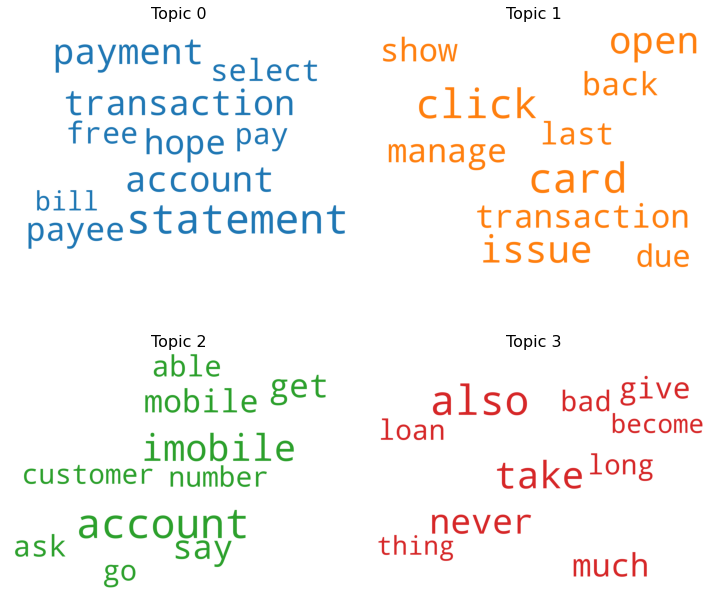

In [23]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## 10. Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [24]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

NameError: name 'data_ready' is not defined

### Sentence Chart Colored by Topic

Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.


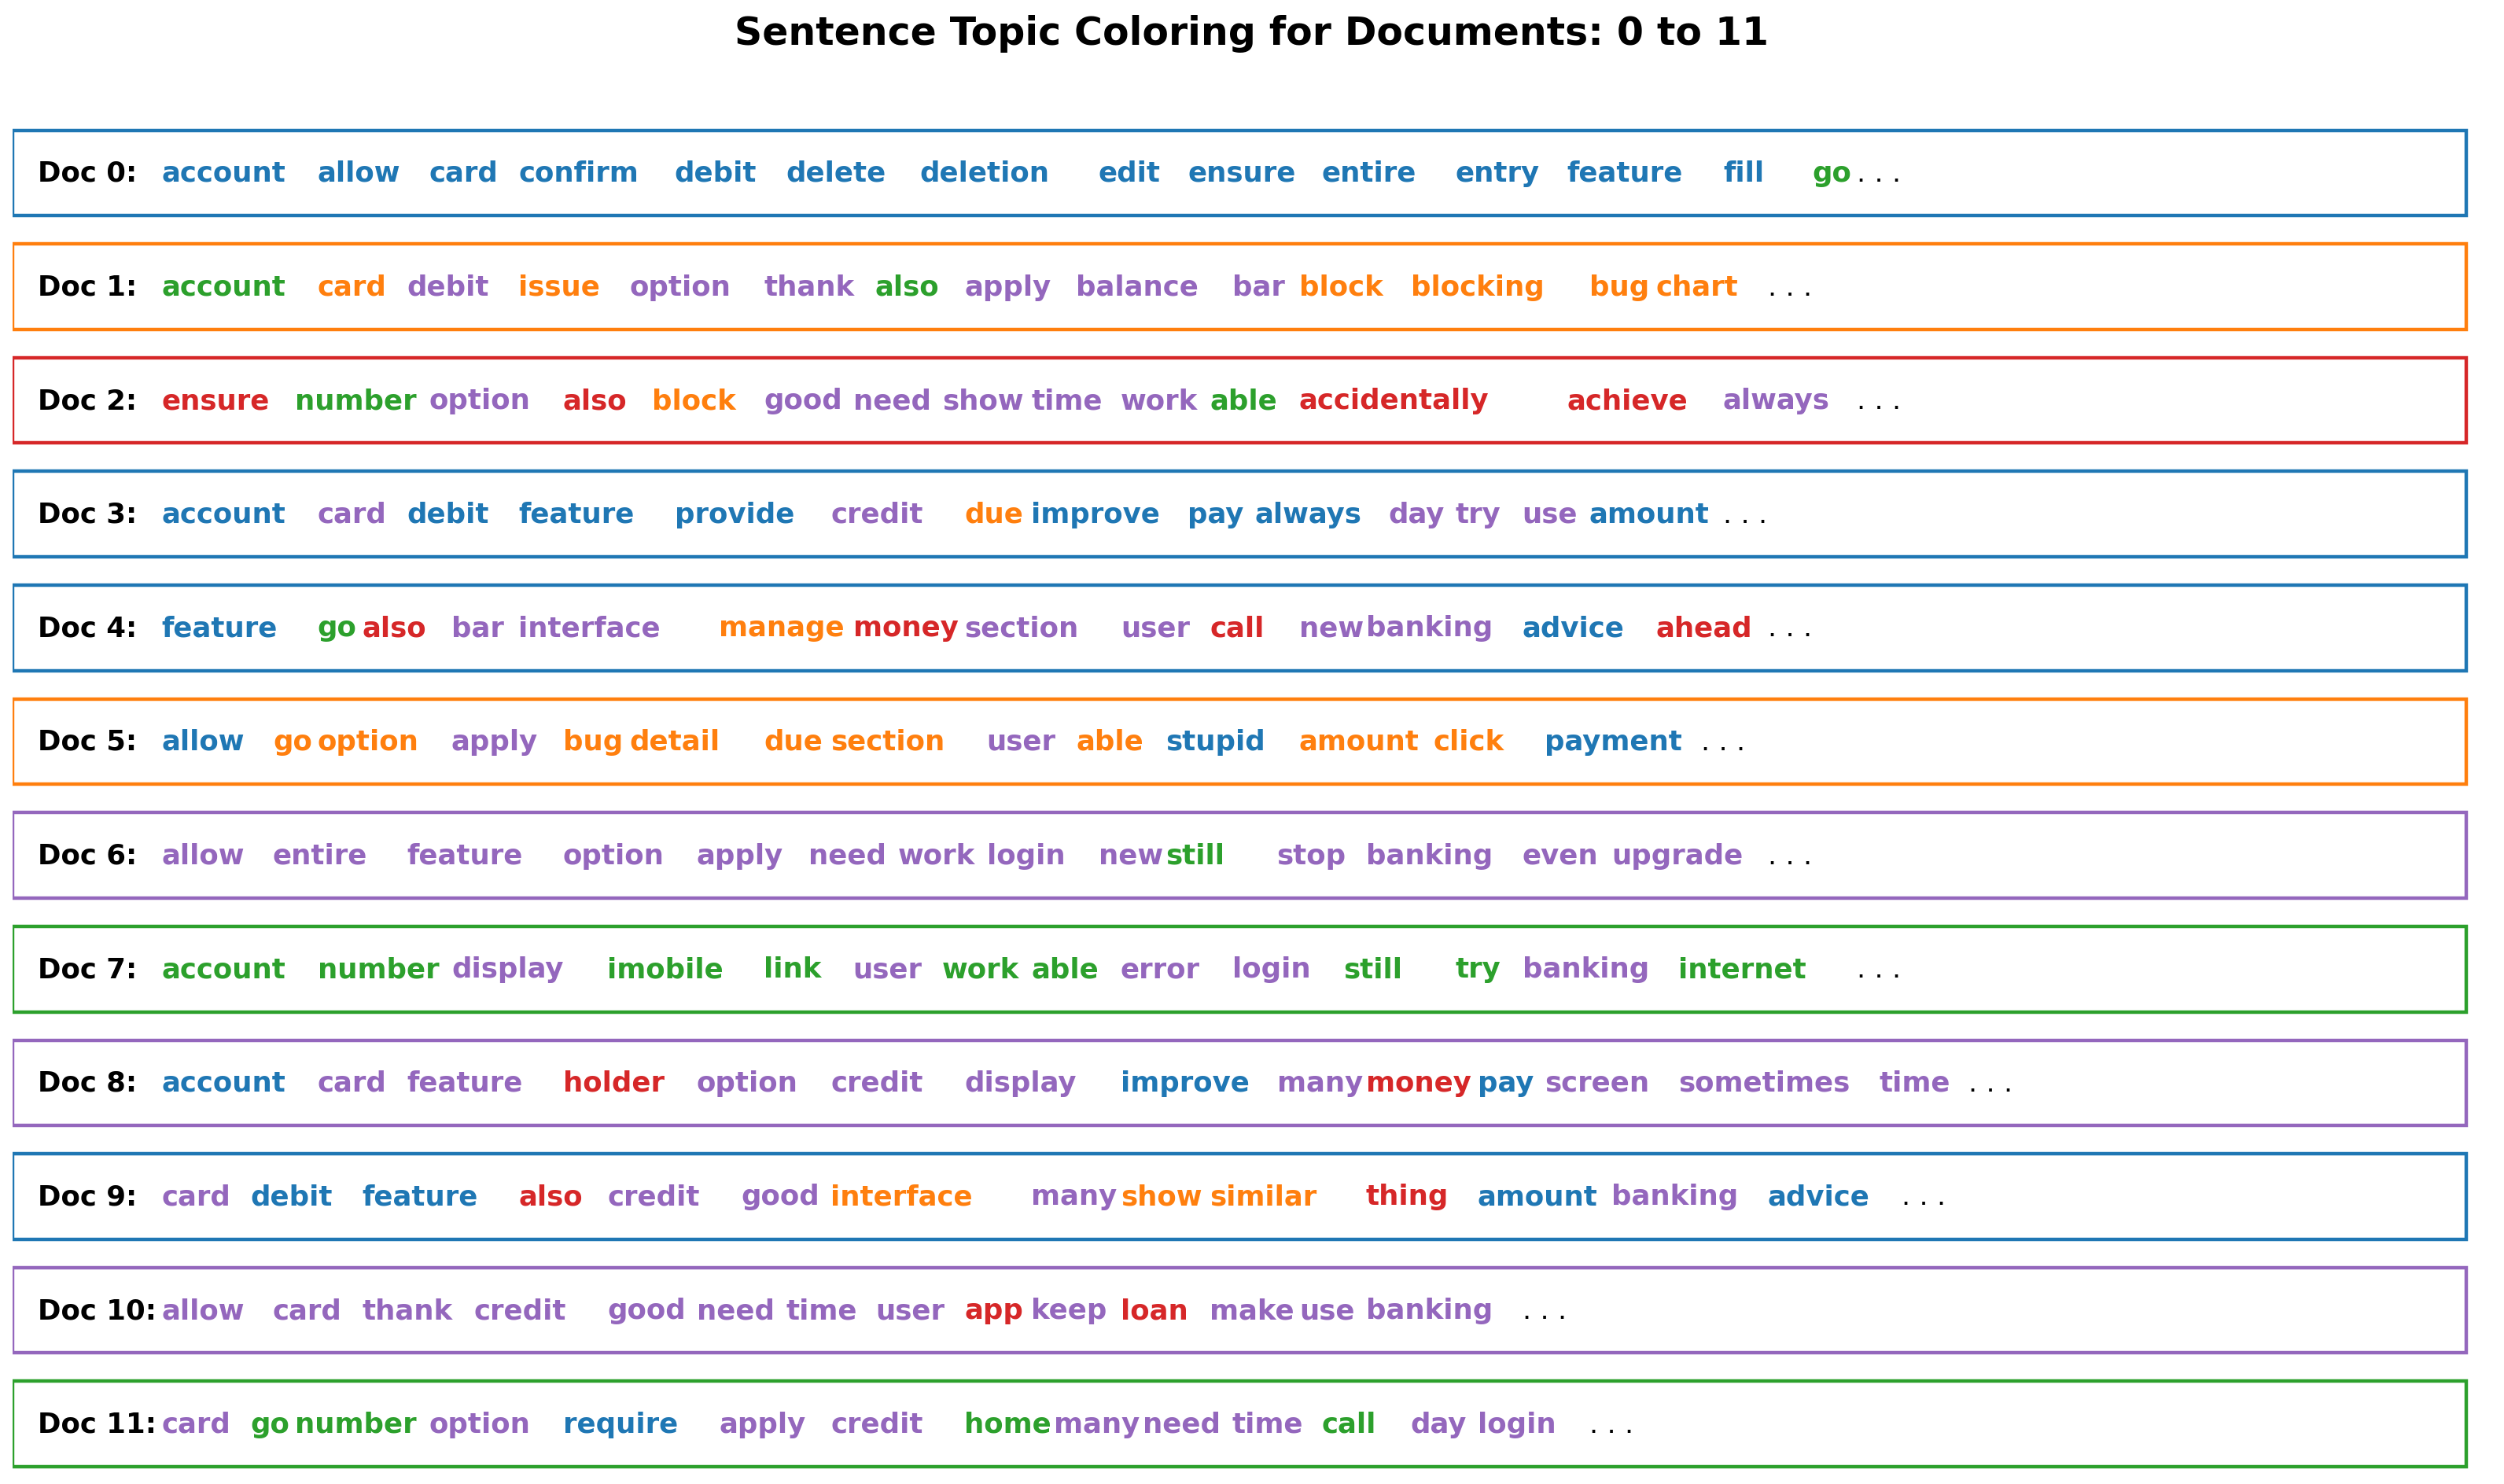

In [25]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

##  What are the most discussed topics in the documents?

In [26]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

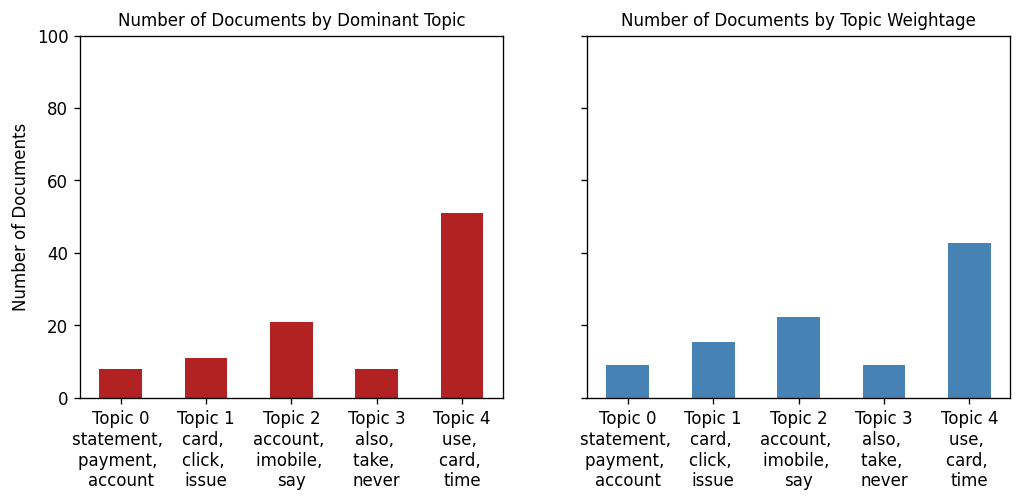

In [29]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 100)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

##  t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [31]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
#! pip3 install bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

     |████████████████████████████████| 18.5 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 97 samples in 0.000s...
[t-SNE] Computed neighbors for 97 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 97 / 97
[t-SNE] Mean sigma: 0.323639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.208603
[t-SNE] KL divergence after 850 iterations: 0.155232


Loading BokehJS ...